## 데이터 전처리

### 데이터 인코딩
- 머신러닝 알고리즘은 문자열 데이터 속성을 입력받지 않으며, 모든 데이터는 숫자형으로 표현되어야 한다.
- 문자형 카테고리형 속송은 모두 숫자값으로 인코딩 되어야 한다.=> 레이블(label) 인코딩-> 가중치가 부여될수 있으므로 선형회귀에서는 사용 x 트리구조는 o
- 피처 값의 유형에 따라 새로운 피처를 추가해 고유 값에 해당하는 컬럼에만 1을 표시하고 나머지 컬럼에는 0을 표시하는 방식이다. => 원-핫(One-Hot) 레코딩 

In [1]:
from sklearn.datasets import load_iris, load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score

from sklearn.preprocessing import LabelEncoder

import pandas as pd
import numpy  as np

In [7]:
item_label = ['TV','냉장고','전자렌지','컴퓨터','선풍기','선풍기','믹서','믹서']
encoder = LabelEncoder()
encoder.fit(item_label)
digit_label=encoder.transform(item_label)
print('encoder',encoder)
print('encoder 결과',digit_label)
print("*"*50)
print('decoder 결과',encoder.inverse_transform([0, 1, 4, 5, 3, 3, 2 ,2]))

encoder LabelEncoder()
encoder 결과 [0 1 4 5 3 3 2 2]
**************************************************
decoder 결과 ['TV' '냉장고' '전자렌지' '컴퓨터' '선풍기' '선풍기' '믹서' '믹서']


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


- One-Hot encoding

In [2]:
from sklearn.preprocessing import OneHotEncoder
item_label = ['TV','냉장고','전자렌지','컴퓨터','선풍기','선풍기','믹서','믹서']
encoder = LabelEncoder()
encoder.fit(item_label)
digit_label=encoder.transform(item_label)

print('type',type(digit_label))

# 2차원 데이터로 변환
digit_label = digit_label.reshape(-1,1)
print(digit_label.shape)

# One-Hot 인코딩
one_hot_encoder=OneHotEncoder()
one_hot_encoder.fit(digit_label)
one_hot_label = one_hot_encoder.transform(digit_label)

print(one_hot_label.toarray())
print(one_hot_label.shape)

type <class 'numpy.ndarray'>
(8, 1)
[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]]
(8, 6)


- pandas get_dummies(df)

In [18]:
one_hot_df=pd.DataFrame({'item' : ['TV','냉장고','전자렌지','컴퓨터','선풍기','선풍기','믹서','믹서']})
one_hot_df

,item
0,TV
1,냉장고
2,전자렌지
3,컴퓨터
4,선풍기
5,선풍기
6,믹서
7,믹서


In [19]:
pd.get_dummies(one_hot_df)

,item_TV,item_냉장고,item_믹서,item_선풍기,item_전자렌지,item_컴퓨터
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,0,0,0,1,0
3,0,0,0,0,0,1
4,0,0,0,1,0,0
5,0,0,0,1,0,0
6,0,0,1,0,0,0
7,0,0,1,0,0,0


- 결측값 처리

In [3]:
from io import StringIO
import pandas as pd
import numpy as np 

csv_data = StringIO("""
x1,x2,x3,x4,x5
1,0.1,"1",2019-01-01,A
2,,,2019-01-02,B
3,,"3",2019-01-03,C
,0.4,"4",2019-01-04,A
5,0.5,"5",2019-01-05,B
,,,2019-01-06,C
7,0.7,"7",,A
8,0.8,"8",2019-01-08,B
9,0.9,,2019-01-09,C
""")

df = pd.read_csv(csv_data)
df


,x1,x2,x3,x4,x5
0,1.0,0.1,1.0,2019-01-01,A
1,2.0,NaN,NaN,2019-01-02,B
2,3.0,NaN,3.0,2019-01-03,C
3,NaN,0.4,4.0,2019-01-04,A
4,5.0,0.5,5.0,2019-01-05,B
5,NaN,NaN,NaN,2019-01-06,C
6,7.0,0.7,7.0,NaN,A
7,8.0,0.8,8.0,2019-01-08,B
8,9.0,0.9,NaN,2019-01-09,C


In [ ]:
# pandas isnull(),isna() 위치 확인
# sum()

In [21]:
df.isnull()

,x1,x2,x3,x4,x5
0,False,False,False,False,False
1,False,True,True,False,False
2,False,True,False,False,False
3,True,False,False,False,False
4,False,False,False,False,False
5,True,True,True,False,False
6,False,False,False,True,False
7,False,False,False,False,False
8,False,False,True,False,False


In [22]:
df.isna().sum()

x1    2
x2    3
x3    3
x4    1
x5    0
dtype: int64

Matplotlib is building the font cache; this may take a moment.


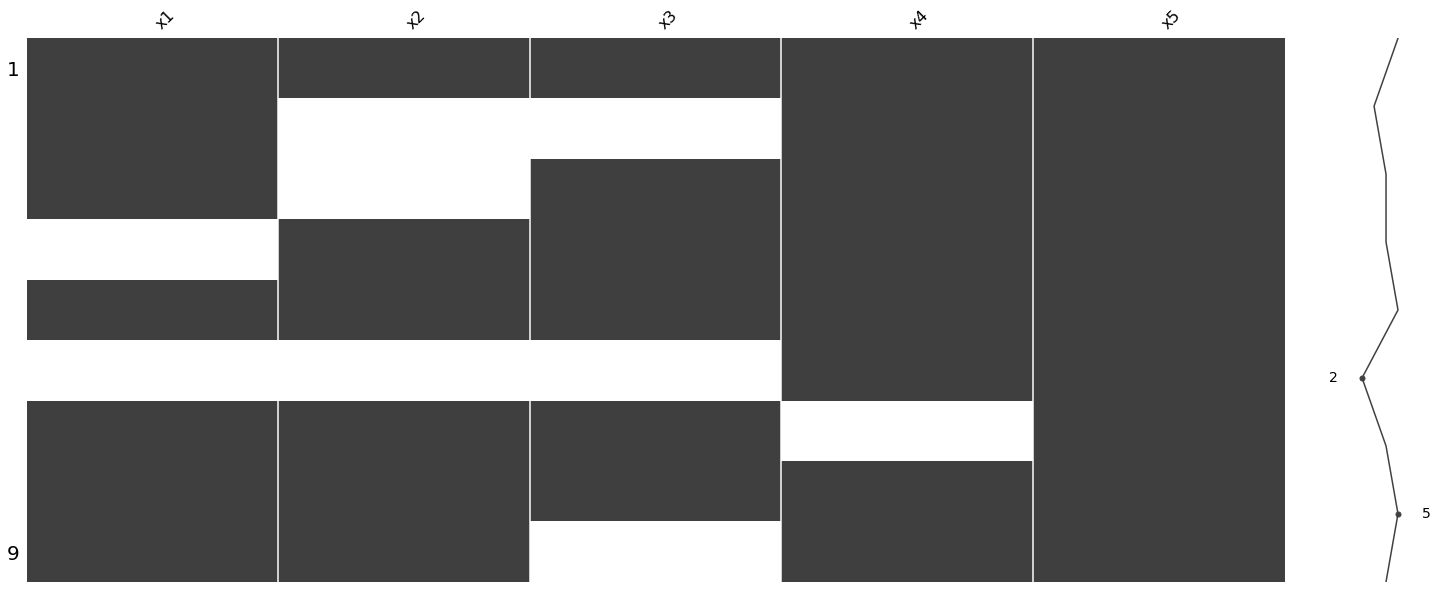

In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

import missingno as msno

msno.matrix(df) #결측데이터를 시각화 결측치는 흰색으로 표시됨 
# 오른쪽 라인은 해당 로우의 결측값이 없는 곳을 알려줌..?
plt.show()

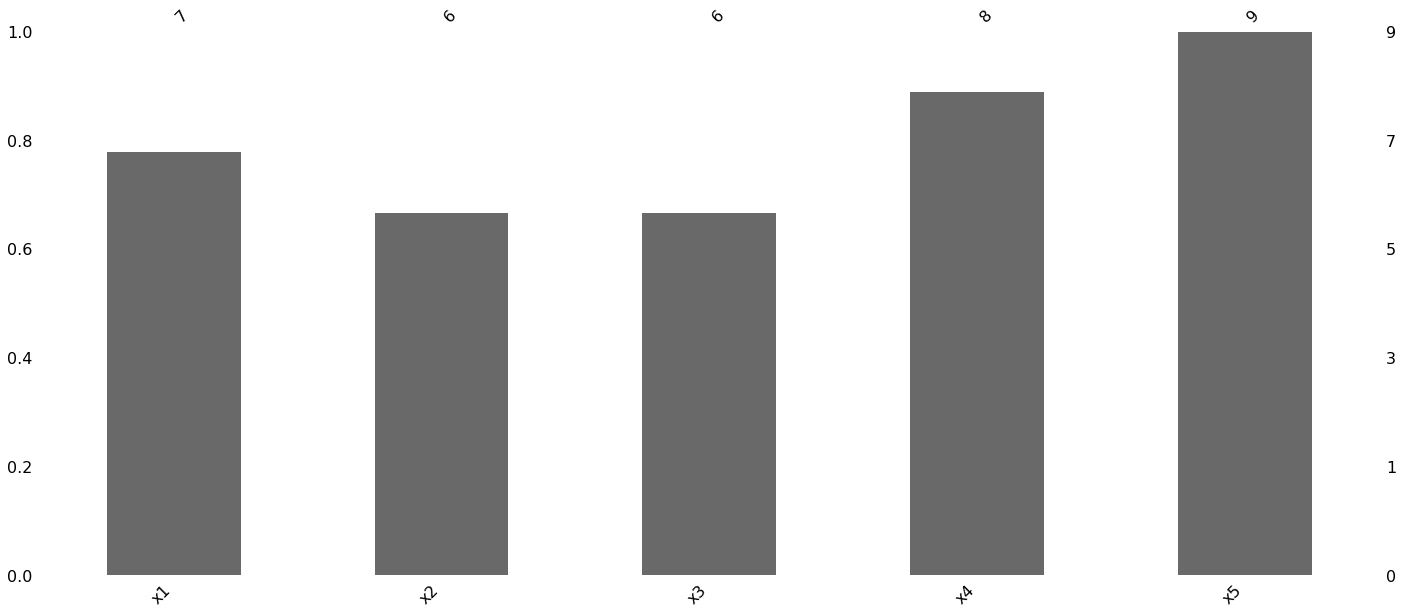

In [27]:
# 만약 각 열에 대한 결측 데이터가 얼마나 존재하는지 시각화하고 싶다면
msno.bar(df)
plt.show()

In [5]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
# 타이타닉 생존자 데이터를 이용한 missingno 쓰임새를 알아보자
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


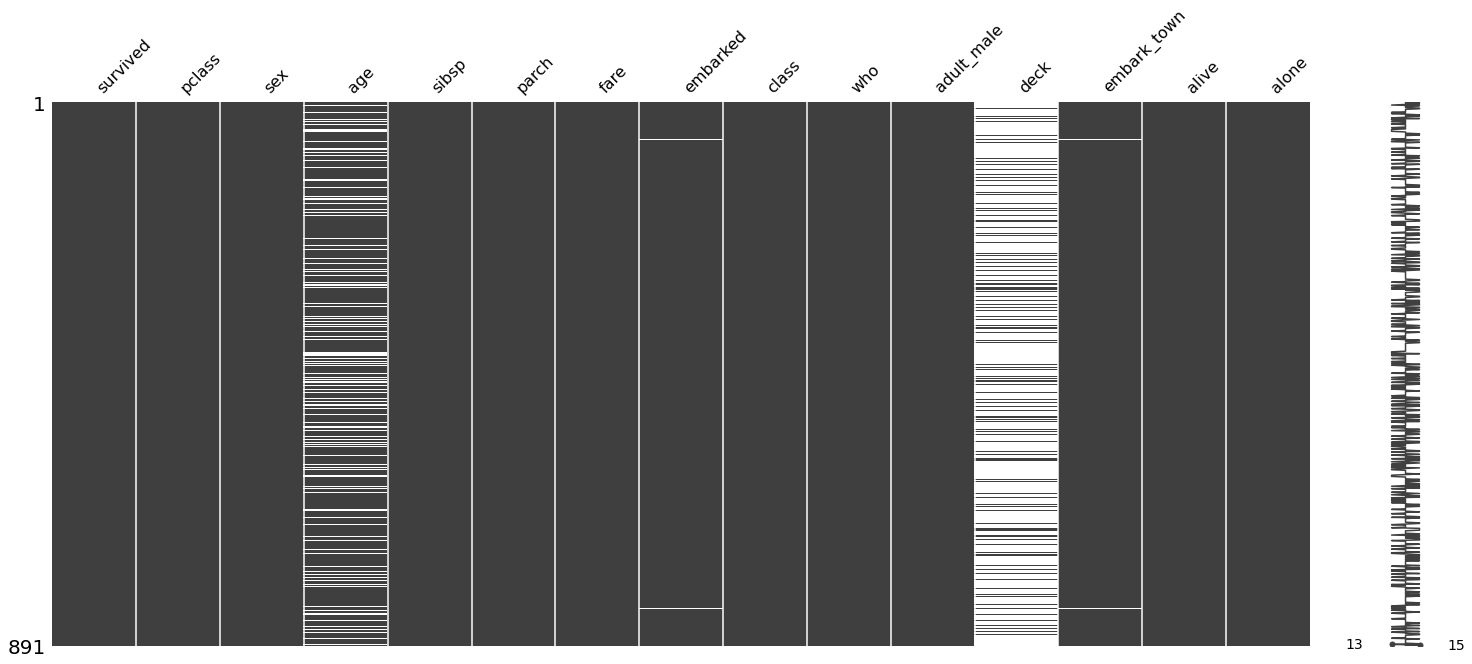

In [7]:
# missingno를 이용하여 타이타닉 데이터에서 age, deck, embarked, embark_town 열에 대한 결측 데이터 확인
msno.matrix(titanic)
plt.show()

### 결측된 데이터를 처리하는 방법
- 결측된 데이터가 너무 많은 경우 해당 데이터의 열 전체를 삭제
- 걀측된 데이터가 일부인 경우 가장 그럴듯한 값으로 대체 

In [32]:
# dropna()
df

,x1,x2,x3,x4,x5
0,1.0,0.1,1.0,2019-01-01,A
1,2.0,NaN,NaN,2019-01-02,B
2,3.0,NaN,3.0,2019-01-03,C
3,NaN,0.4,4.0,2019-01-04,A
4,5.0,0.5,5.0,2019-01-05,B
5,NaN,NaN,NaN,2019-01-06,C
6,7.0,0.7,7.0,NaN,A
7,8.0,0.8,8.0,2019-01-08,B
8,9.0,0.9,NaN,2019-01-09,C


In [33]:
df.dropna()

,x1,x2,x3,x4,x5
0,1.0,0.1,1.0,2019-01-01,A
4,5.0,0.5,5.0,2019-01-05,B
7,8.0,0.8,8.0,2019-01-08,B


In [34]:
# 결측값이 존재하는 열 삭제 
df.dropna(axis=1)

,x5
0,A
1,B
2,C
3,A
4,B
5,C
6,A
7,B
8,C


In [36]:
# thresh 특정 갯수 이상이 비결측 데이터가 있는 행 또는 열만 남긴다
df.dropna(thresh=7,axis=1)

,x1,x4,x5
0,1.0,2019-01-01,A
1,2.0,2019-01-02,B
2,3.0,2019-01-03,C
3,NaN,2019-01-04,A
4,5.0,2019-01-05,B
5,NaN,2019-01-06,C
6,7.0,NaN,A
7,8.0,2019-01-08,B
8,9.0,2019-01-09,C


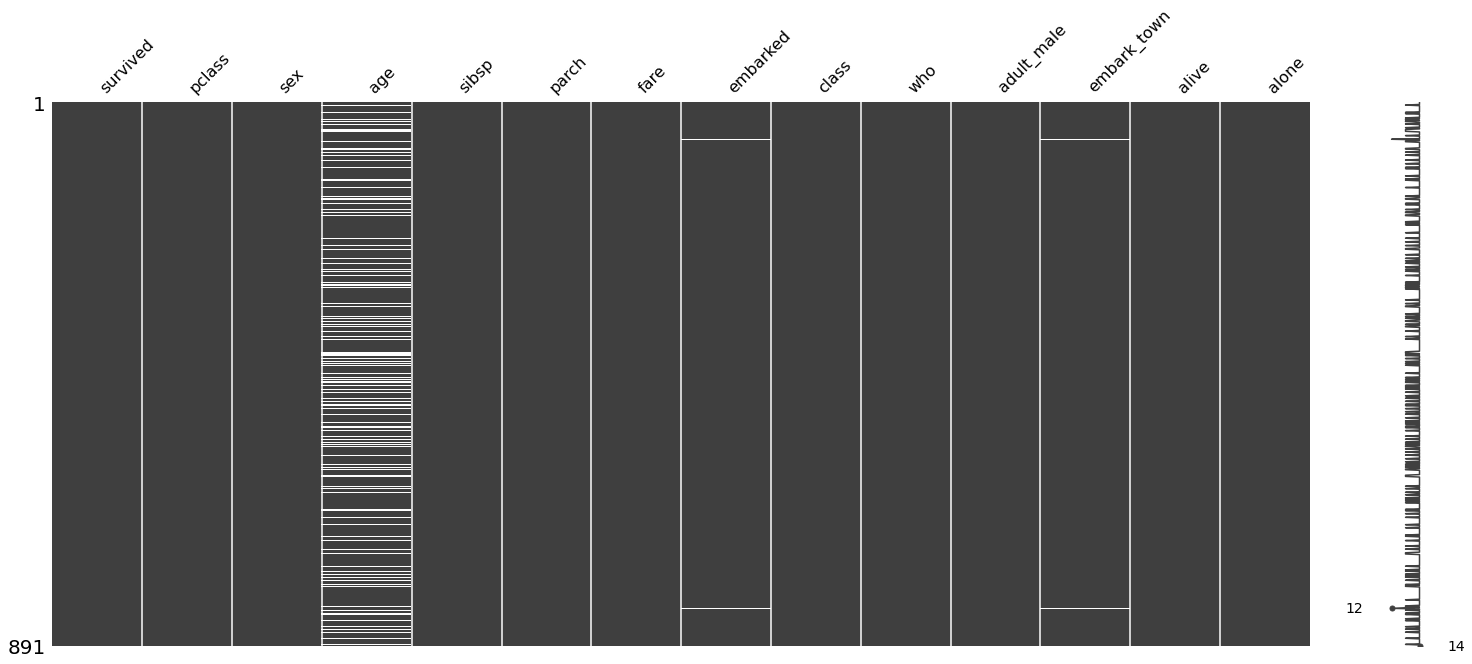

In [8]:
# deck 열을 삭제하고 싶다면?
titanic.dropna(thresh=int(len(titanic)*0.5),axis=1,inplace=True)
msno.matrix(titanic)
plt.show()

In [ ]:
# 결측 데이터를 대체하는 방법 
# sklearn - SimpleImputer(평균, 중앙, 최빈)
# fit transform 대체값이 채워진 데이터 프레임을 생성할 수 있다

In [9]:
from sklearn.impute import SimpleImputer

In [5]:
import sklearn
print(sklearn.__version__)

0.23.2


In [10]:
from sklearn.datasets import load_iris, load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score

from sklearn.preprocessing import LabelEncoder

import pandas as pd
import numpy  as np

In [12]:
# mean, median, most_frequent
# 최빈값으로 대체 -> 평균과 중위수는 날짜 타입은 데이터때문에 힘듬
imputer = SimpleImputer(strategy = 'most_frequent')
df=pd.DataFrame(imputer.fit_transform(df),columns=df.columns)
df

,x1,x2,x3,x4,x5
0,1,0.1,1,2019-01-01,A
1,2,0.1,1,2019-01-02,B
2,3,0.1,3,2019-01-03,C
3,1,0.4,4,2019-01-04,A
4,5,0.5,5,2019-01-05,B
5,1,0.1,1,2019-01-06,C
6,7,0.7,7,2019-01-01,A
7,8,0.8,8,2019-01-08,B
8,9,0.9,1,2019-01-09,C


In [14]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


In [16]:
# 한글 폰트 문제 해결
import platform

from matplotlib import font_manager, rc
# plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~') 

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


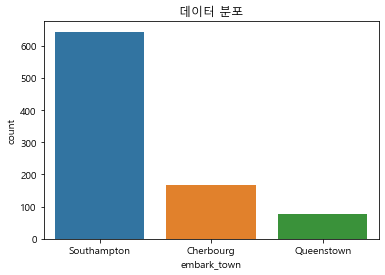

In [17]:
sns.countplot(titanic.embark_town)
plt.title('데이터 분포')
plt.show()

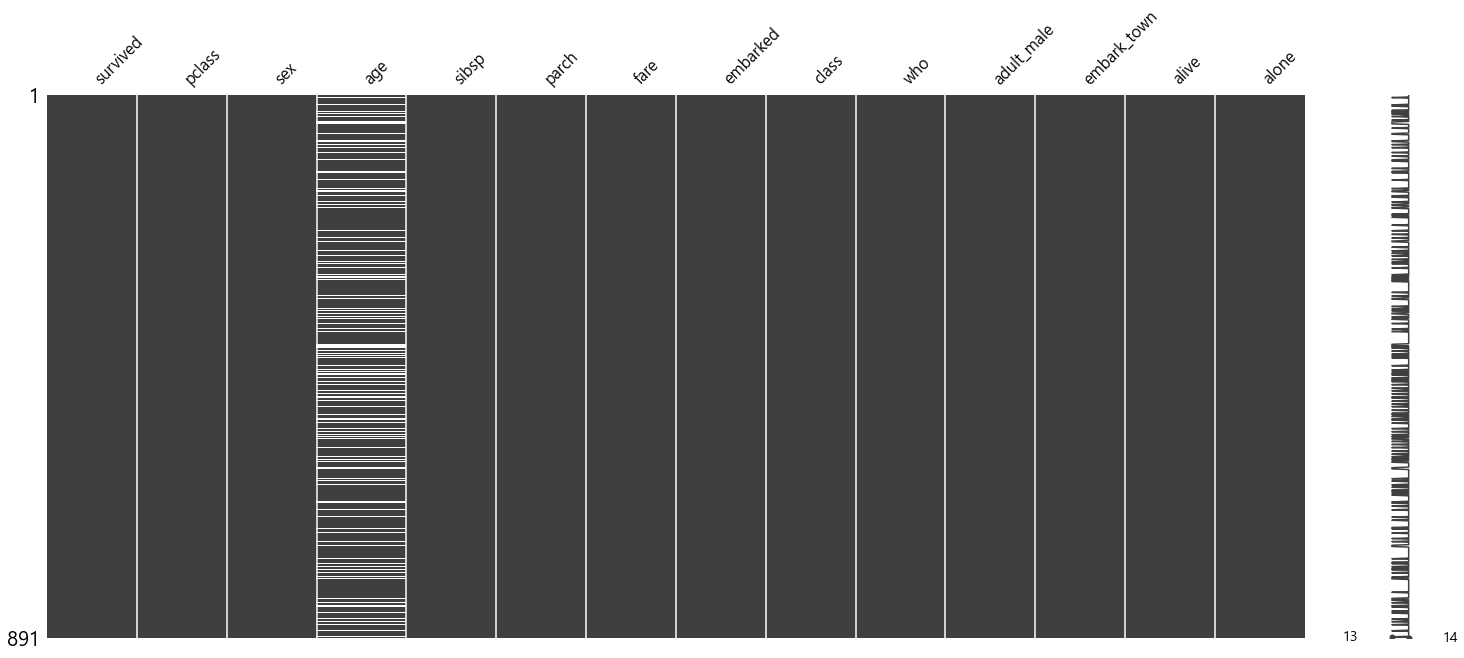

In [21]:
# mean, median, most_frequent
# 최빈값으로 대체 - 일부만
titanic_embark_town_imputer = SimpleImputer(strategy = 'most_frequent')
titanic['embarked'] = titanic_embark_town_imputer.fit_transform(titanic[['embarked']])
titanic['embark_town'] = titanic_embark_town_imputer.fit_transform(titanic[['embark_town']])

msno.matrix(titanic)
plt.show()

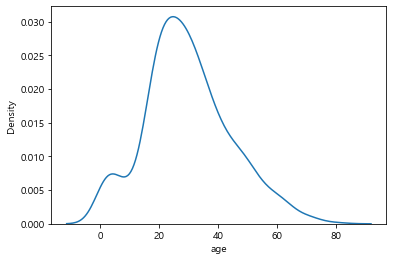

In [22]:
# 확인결과 age열만 결측값을 가지고 있고 
# 수치형일경우 데이터 분포를 확인하고 어떻게 대체할것인지를 고민
# 정규분포일때는 평균이나 median 

sns.kdeplot(titanic.age)
plt.show()

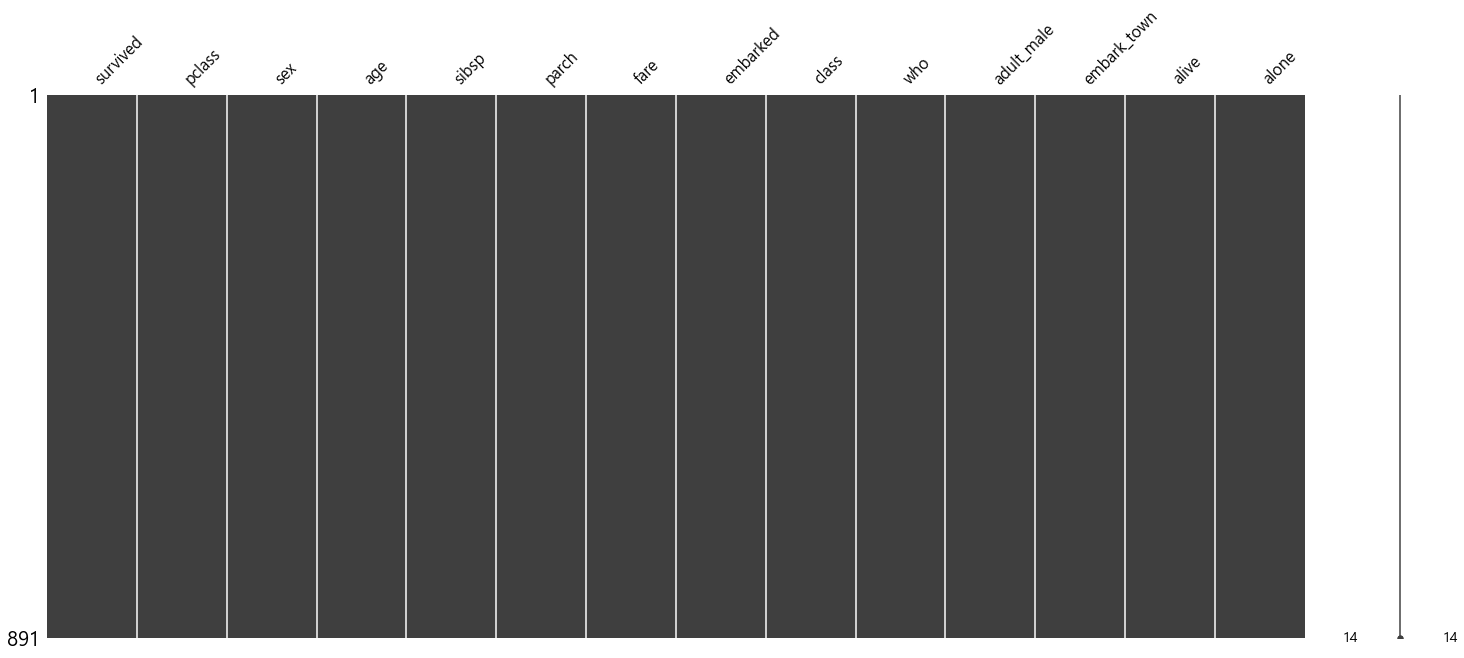

In [23]:
# age 중앙값으로 대체한다면?

titanic_age_imputer = SimpleImputer(strategy = 'median')
titanic['age'] = titanic_age_imputer.fit_transform(titanic[['age']])

msno.matrix(titanic)
plt.show()



### Feature Scailing

데이터의 단위가 다를때 사용

- 표준화 : 평균이 0이고 분산이 1인 정규분포를 가진 값으로 변환 -> StandardScaler
- 정규화 : 서로 다른 피처의 크기를 통일하기위해 변환 (최대 최소 필요) -> MinMaxScaler

- Normalization(정규화) : 모든 feature가 0과 1 사이의 값으로 변환(음수가 있으면 1)
- MinMaxScalar
- 데이터의 최소값, 최대값을 알 경우 사용가능
- 공식 = (X-X의 최소값)/(X의 최대값 - X의 최소값)

In [25]:
df = pd.DataFrame({'A':[14.00,90.20,90.95,96.27,91.21],'B':[103.02,107.26,110.35,114.23,114.68], 'C':['big','small','big','small','small']})
df

,A,B,C
0,14.00,103.02,big
1,90.20,107.26,small
2,90.95,110.35,big
3,96.27,114.23,small
4,91.21,114.68,small


In [26]:
df['A']

0    14.00
1    90.20
2    90.95
3    96.27
4    91.21
Name: A, dtype: float64

In [28]:
(df['A']-df['A'].min())/(df['A'].max()-df['A'].min())

0    0.000000
1    0.926219
2    0.935335
3    1.000000
4    0.938495
Name: A, dtype: float64

- Standardiztion(표쥰화) : 뱐수의 범위를 정규분포(평균 0, 편차 1)변환
- 데이터의 최소, 최대값을 모를 경우 사용하면 된다.
- 공식) (X-X평균값)/(X 표준편차)
- StandardScaler

In [29]:
df['B'].mean(), df['B'].std()

(109.90799999999999, 4.901619120249964)

In [31]:
df['B'] = (df['B']-df['B'].mean())/df['B'].std()
df

,A,B,C
0,14.00,-1.405250,big
1,90.20,-0.540230,small
2,90.95,0.090174,big
3,96.27,0.881749,small
4,91.21,0.973556,small


In [49]:
def feature_scaling(df, scaling_strategy="min-max", column=None):
    if column == None:
        column = [column_name for column_name in df.columns]
    for column_name in column:
        if scaling_strategy == "min-max":
            df[column_name] = ( df[column_name] - df[column_name].min() ) /\
                            (df[column_name].max() - df[column_name].min()) 
        elif scaling_strategy == "z-score":
            df[column_name] = ( df[column_name] - \
                               df[column_name].mean() ) /\
                            (df[column_name].std() )
    return df


In [47]:
df = pd.DataFrame({'A':[14.00,90.20,90.95,96.27,91.21],'B':[103.02,107.26,110.35,114.23,114.68], 'C':['big','small','big','small','small']})
df


,A,B,C
0,14.00,103.02,big
1,90.20,107.26,small
2,90.95,110.35,big
3,96.27,114.23,small
4,91.21,114.68,small


In [48]:
scaling_df=feature_scaling(df,scaling_strategy='z-score',column=['A','B'])
scaling_df

,A,B,C
0,-1.784641,-1.405250,big
1,0.390289,-0.540230,small
2,0.411695,0.090174,big
3,0.563541,0.881749,small
4,0.419116,0.973556,small


- 주의사항

In [53]:
df = pd.io.parsers.read_csv(
    'https://raw.githubusercontent.com/rasbt/pattern_classification/master/data/wine_data.csv',
     header=None,
     usecols=[0,1,2]
    )

In [54]:
df.columns=['Class label','Alcohol','Malic acid']
df

,Class label,Alcohol,Malic acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59
...,...,...,...
173,3,13.71,5.65
174,3,13.40,3.91
175,3,13.27,4.28
176,3,13.17,2.59


In [58]:
alochol_df = feture_scaling(df, scaling_strategy='min-max', 
                            column=['Alcohol','Malic acid'])
alochol_df

,Class label,Alcohol,Malic acid
0,1,0.842105,0.191700
1,1,0.571053,0.205534
2,1,0.560526,0.320158
3,1,0.878947,0.239130
4,1,0.581579,0.365613
...,...,...,...
173,3,0.705263,0.970356
174,3,0.623684,0.626482
175,3,0.589474,0.699605
176,3,0.563158,0.365613


- sklearn feature scaling
- fit(규칙생성), transform(규칙적용)의 과정을 거친다
- fit_transform() 한번에 가능

In [56]:
df = pd.io.parsers.read_csv(
    'https://raw.githubusercontent.com/rasbt/pattern_classification/master/data/wine_data.csv',
     header=None,
     usecols=[0,1,2]
    )

In [57]:
df.columns=['Class label','Alcohol','Malic acid']
df

,Class label,Alcohol,Malic acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59
...,...,...,...
173,3,13.71,5.65
174,3,13.40,3.91
175,3,13.27,4.28
176,3,13.17,2.59


- StandardScaler
- MinMaxScaler

In [62]:
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler

# 표준화
std_scaler = StandardScaler()
df_std=std_scaler.fit(df[['Alcohol','Malic acid']]).transform(df[['Alcohol','Malic acid']])
print(df_std[:5])

print('*'*50)

# 정규화
minmax_scaler = MinMaxScaler()
df_mm=minmax_scaler.fit(df[['Alcohol','Malic acid']]).transform(df[['Alcohol','Malic acid']])
print(df_mm[:5])

[[ 1.51861254 -0.5622498 ]
 [ 0.24628963 -0.49941338]
 [ 0.19687903  0.02123125]
 [ 1.69154964 -0.34681064]
 [ 0.29570023  0.22769377]]
**************************************************
[[0.84210526 0.1916996 ]
 [0.57105263 0.2055336 ]
 [0.56052632 0.3201581 ]
 [0.87894737 0.23913043]
 [0.58157895 0.36561265]]


In [63]:
train_array=np.arange(0,11).reshape(-1,1)
test_array=np.arange(0,6).reshape(-1,1)

In [64]:
train_array

array([[ 0],
       [ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

In [65]:
test_array

array([[0],
       [1],
       [2],
       [3],
       [4],
       [5]])

In [68]:
scaler = MinMaxScaler()
train_scaler = scaler.fit(train_array).transform(train_array)
print('raw data : ', np.round(train_array.reshape(-1),2)) # 1차원으로 바꿔줌
print('scaler data : ', np.round(train_scaler.reshape(-1),2))

raw data :  [ 0  1  2  3  4  5  6  7  8  9 10]
scaler data :  [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


In [70]:
test_scaler=scaler.fit(test_array).transform(test_array)
print('test data : ', np.round(test_array.reshape(-1),2))
print('scaler data : ', np.round(test_scaler.reshape(-1),2))

test data :  [0 1 2 3 4 5]
scaler data :  [0.  0.2 0.4 0.6 0.8 1. ]


주의사항
- train scale 진행 test에 대한 scale은 진행해서는 안된다 
- test데이터는 fit을 하는게 아니라 transform 만 적용해야한다

In [72]:
scaler = MinMaxScaler()
train_scaler = scaler.fit(train_array).transform(train_array)
print('raw data : ', np.round(train_array.reshape(-1),2)) # 1차원으로 바꿔줌
print('scaler data : ', np.round(train_scaler.reshape(-1),2))

test_scaler=scaler.transform(test_array)
print('test data : ', np.round(test_array.reshape(-1),2))
print('scaler data : ', np.round(test_scaler.reshape(-1),2))

raw data :  [ 0  1  2  3  4  5  6  7  8  9 10]
scaler data :  [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
test data :  [0 1 2 3 4 5]
scaler data :  [0.  0.1 0.2 0.3 0.4 0.5]


- 아이리스 붓꽃데이터 세트를 이용한 피쳐 스케일링

In [73]:
from sklearn.datasets import load_iris
import pandas as pd
# 붓꽃 데이터 셋을 로딩하고 DataFrame으로 변환합니다. 
iris = load_iris()
iris_data = iris.data
iris_df = pd.DataFrame(data=iris_data, columns=iris.feature_names)

print('feature 들의 평균 값')
print(iris_df.mean())
print('\nfeature 들의 분산 값')
print(iris_df.var())

feature 들의 평균 값
sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64

feature 들의 분산 값
sepal length (cm)    0.685694
sepal width (cm)     0.189979
petal length (cm)    3.116278
petal width (cm)     0.581006
dtype: float64


In [74]:
from sklearn.preprocessing import StandardScaler

# StandardScaler객체 생성
scaler = StandardScaler()
# StandardScaler 로 데이터 셋 변환. fit( ) 과 transform( ) 호출.  
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)

#transform( )시 scale 변환된 데이터 셋이 numpy ndarry로 반환되어 이를 DataFrame으로 변환
iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)
print('feature 들의 평균 값')
print(iris_df_scaled.mean())
print('\nfeature 들의 분산 값')
print(iris_df_scaled.var())


feature 들의 평균 값
sepal length (cm)   -1.690315e-15
sepal width (cm)    -1.842970e-15
petal length (cm)   -1.698641e-15
petal width (cm)    -1.409243e-15
dtype: float64

feature 들의 분산 값
sepal length (cm)    1.006711
sepal width (cm)     1.006711
petal length (cm)    1.006711
petal width (cm)     1.006711
dtype: float64


In [75]:
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler객체 생성
scaler = MinMaxScaler()
# MinMaxScaler 로 데이터 셋 변환. fit() 과 transform() 호출.  
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)

# transform()시 scale 변환된 데이터 셋이 numpy ndarry로 반환되어 이를 DataFrame으로 변환
iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)
print('feature들의 최소 값')
print(iris_df_scaled.min())
print('\nfeature들의 최대 값')
print(iris_df_scaled.max())

feature들의 최소 값
sepal length (cm)    0.0
sepal width (cm)     0.0
petal length (cm)    0.0
petal width (cm)     0.0
dtype: float64

feature들의 최대 값
sepal length (cm)    1.0
sepal width (cm)     1.0
petal length (cm)    1.0
petal width (cm)     1.0
dtype: float64
